In [1]:
import tensorflow as tf


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline # Only use this if using iPython

UsageError: unrecognized arguments: # Only use this if using iPython


In [2]:
# LOAD data from tensorflow  dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
import os 
os.listdir()

['.ipynb_checkpoints',
 'data',
 'data-details.txt',
 'LR - Copy.ipynb',
 'LR.ipynb',
 'MN.ipynb',
 'MNIST-CNN.ipynb',
 'mnistasjpg',
 'object_detection_tutorial.ipynb',
 'regression-data']

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
y_train.shape

(60000,)

6


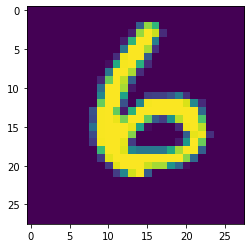

In [14]:
image_index = 2311 
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index])

In [15]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [16]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.
W0930 17:30:01.796707 90476 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0930 17:30:02.492387 90476 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0930 17:30:02.599144 90476 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0930 17:30:02.796356 90476 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_poo

In [17]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

W0930 17:30:32.370866 90476 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0930 17:30:32.406768 90476 deprecation_wrapper.py:119] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0930 17:30:32.818605 90476 deprecation.py:323] From C:\Users\20131073\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2026 - acc: 0.9390
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0795 - acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0564 - acc: 0.9817
Epoch 4/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0423 - acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0348 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0286 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0250 - acc: 0.9918
Epoch 8/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0210 - acc: 0.9926
Epoch 9/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0202 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0172 - acc: 0.9941

In [20]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 472us/step


[0.0597064713775686, 0.985]

predicted output for image --->  2


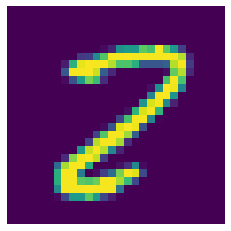

In [29]:
image_index = 444
plt.imshow(x_test[image_index].reshape(28, 28))
plt.axis("off")
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("predicted output for image ---> ",pred.argmax())

## Save trained model to disk

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("model_mnist_cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_mnist_cnn.h5")
print("Saved model to disk")

Saved model to disk


## Load saved model and predict

In [31]:
from keras.models import model_from_json
# load json and create model
json_file = open('model_mnist_cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_mnist_cnn.h5")
print("Loaded model from disk")

Loaded model from disk


In [32]:
#predict from loaded model

loaded_model.predict(x_test)

array([[2.30975430e-11, 6.20036054e-12, 4.41706602e-11, ...,
        1.00000000e+00, 9.81947079e-10, 4.94966823e-09],
       [1.39862186e-15, 1.06201284e-10, 1.00000000e+00, ...,
        1.95755442e-22, 3.02884925e-19, 8.84526484e-22],
       [2.42744071e-11, 9.99992728e-01, 3.11767767e-09, ...,
        1.75350408e-06, 4.24864902e-06, 1.32994823e-10],
       ...,
       [3.68881488e-23, 2.43241710e-15, 7.29108668e-22, ...,
        1.29591785e-13, 6.28645660e-12, 1.39414635e-09],
       [8.70106278e-21, 2.33524357e-18, 5.66146896e-17, ...,
        1.32225814e-18, 6.93246847e-08, 3.45080987e-23],
       [1.07382494e-17, 3.31298825e-20, 3.52903142e-17, ...,
        3.38720565e-22, 5.81219979e-17, 6.57211127e-23]], dtype=float32)